In [1]:
# Dependencies and Setup

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import scipy.stats as st

In [5]:
# Study data files

In [6]:
mouse_metadata_path = "/Users/davidspir/Downloads/Mouse_metadata.csv"

In [7]:
study_results_path = "/Users/davidspir/Downloads/Study_results.csv"

In [8]:
# Read the mouse data and the study results

In [9]:
mouse_metadata = pd.read_csv(mouse_metadata_path)

In [10]:
study_results = pd.read_csv(study_results_path)

In [11]:
# Combine the data into a single dataset.

In [36]:
total_data = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")
total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [13]:
# Checking the number of mice.

In [37]:
mice_data = total_data["Mouse ID"].unique()
number_of_mice = len(mice_data)
number_of_mice

249

In [ ]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [40]:
duplicate_mouse = total_data[total_data[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicate_mouse_ids = duplicate_mouse["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [ ]:
#Get all the data for the duplicate mouse ID.

In [41]:
mice_duplicates_data = total_data.loc[total_data["Mouse ID"] == duplicate_mouse_ids[0]]
mice_duplicates_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

In [42]:
clean_total_data=total_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [ ]:
# Checking the number of mice in the clean DataFrame.


In [43]:
clean_mice_data = clean_total_data["Mouse ID"].unique()
clean_number_of_mice = len(clean_mice_data)
clean_number_of_mice

249

# Summary Statistics

In [25]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


In [46]:
drug_reg_data = clean_total_data.set_index(["Drug Regimen"])


In [47]:
group_drug_data = drug_reg_data.groupby("Drug Regimen")

In [48]:
drug_reg_mean = group_drug_data["Tumor Volume (mm3)"].mean()

In [53]:
drug_reg_median = group_drug_data["Tumor Volume (mm3)"].median()

In [50]:
drug_reg_var = group_drug_data["Tumor Volume (mm3)"].var()

In [51]:
drug_reg_std = group_drug_data["Tumor Volume (mm3)"].std()

In [52]:
drug_reg_sem = group_drug_data["Tumor Volume (mm3)"].sem()

In [54]:
# Assemble the resulting series into a single summary DataFrame.

In [55]:
drug_reg_sum_df  = pd.DataFrame({"Mean Tumor Volume":  drug_reg_mean,"Median Tumor Volume":  drug_reg_median,"Tumor Volume Variance":  drug_reg_var,"Tumor Volume Std. Dev.":  drug_reg_std,"Tumor Volume Std. Err.":  drug_reg_sem})

In [56]:
drug_reg_sum_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor 

In [58]:
# Using the aggregation method, produce the same summary statistics in a single line.

In [59]:
agg_drug_reg_sum_df = drug_reg_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
agg_drug_reg_sum_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# bar and pie charts

In [60]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


In [61]:
# Filter the DataFrame down only to those columns to chart

In [62]:
mouse_and_drugs = clean_total_data[["Drug Regimen","Timepoint"]]

In [63]:
#find count per drug

In [64]:
mouse_per_drug = mouse_and_drugs["Drug Regimen"].value_counts()
mouse_per_drug

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     156
Name: count, dtype: int64

In [65]:
#Use DataFrame.plot() in order to create a bar chart of the data

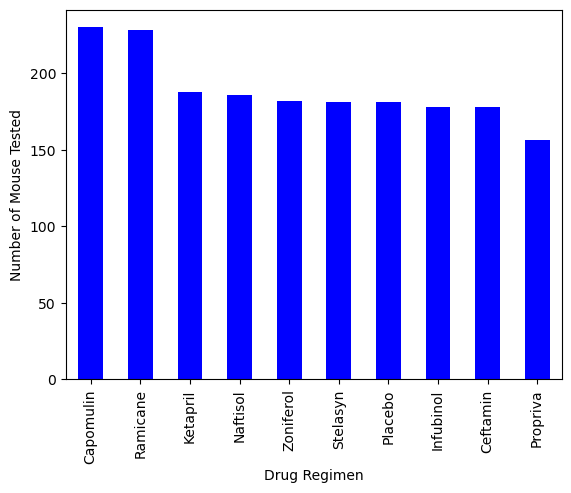

In [67]:
mouse_per_drug.plot(kind="bar",color = "b",
                  xlabel="Drug Regimen",
                  ylabel="Number of Mouse Tested")
plt.show()

In [68]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot

In [70]:
drugs = mouse_per_drug.index.values

In [71]:
count = mouse_per_drug.values

In [72]:
#graph build and display

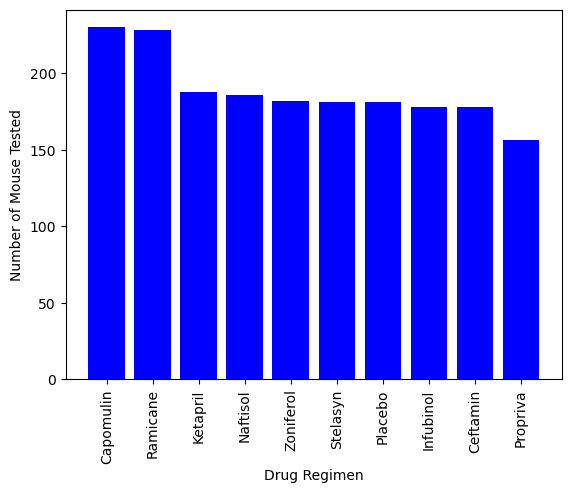

In [80]:
plt.bar(drugs, count, color="b", align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse Tested')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

Sex
Male      958
Female    930
Name: count, dtype: int64

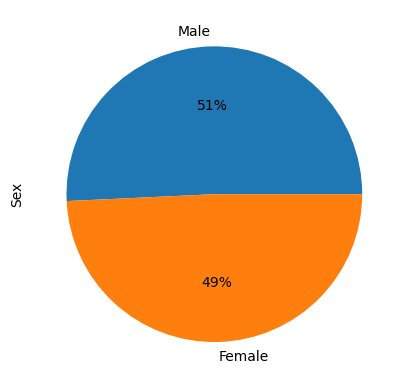

In [82]:
male_vs_female = clean_total_data["Sex"].value_counts()
Sex = ["Male", "Female"]
male_vs_female.plot(kind = "pie" , autopct="%1.0f%%", ylabel = "Sex")
male_vs_female

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


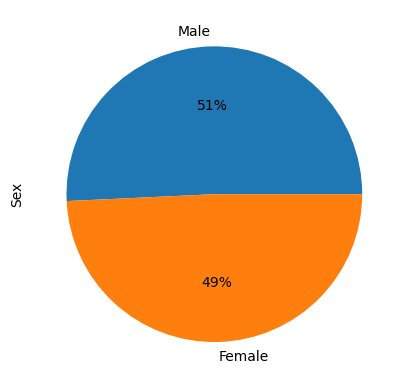

In [83]:
sex_label = male_vs_female.index.values
count_value = male_vs_female.values
plt.ylabel("Sex")
plt.pie(count_value, labels = sex_label, autopct="%1.0f%%")
plt.show()

# quartiles, outliers and boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:

In [85]:
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [129]:
reduced_drug_data = clean_total_data.loc[(clean_total_data["Drug Regimen"] == "Capomulin") | (clean_total_data["Drug Regimen"] == "Ramicane") |(clean_total_data["Drug Regimen"] == "Infubinol") |(clean_total_data["Drug Regimen"] == "Ceftamin") ]


In [86]:
# Start by getting the last (greatest) timepoint for each mouse

In [130]:
last_timepoint = reduced_drug_data.groupby(["Drug Regimen","Mouse ID"]).last()
new_last_timepoint = last_timepoint.reset_index()

In [133]:
reduced_last_timepoint=new_last_timepoint[["Drug Regimen", "Tumor Volume (mm3)"]]
reduced_last_timepoint

capomulin_df = reduced_last_timepoint.loc[reduced_last_timepoint["Drug Regimen"] == "Capomulin"]
capomulin_df

ramicane_df = reduced_last_timepoint.loc[reduced_last_timepoint["Drug Regimen"] == "Ramicane"]
ramicane_df

infubinol_df = reduced_last_timepoint.loc[reduced_last_timepoint["Drug Regimen"] == "Infubinol"]
infubinol_df

ceftamin_df = reduced_last_timepoint.loc[reduced_last_timepoint["Drug Regimen"] == "Ceftamin"]
ceftamin_df
new_df = pd.DataFrame({"Capomulin": capomulin_df["Tumor Volume (mm3)"],"Ramicane": ramicane_df["Tumor Volume (mm3)"],"Infubinol": infubinol_df["Tumor Volume (mm3)"],"Ceftamin": ceftamin_df["Tumor Volume (mm3)"]})

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)

In [135]:
treatment = []
for drug in reduced_last_tp["Drug Regimen"]:
    if drug not in treatment:
        treatment.append(drug)
treatment

['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

In [ ]:
# Create empty list to fill with tumor vol data (for plotting)

In [146]:
tum_vol = []
upperq_list = []


In [147]:
lowerq_list = []

In [142]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

In [143]:
for drug in treatment:    
    quartiles = new_df[drug].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    drug_iqr = upperq-lowerq
    upperq_list.append(upperq)
    lowerq_list.append(lowerq)
    print(f"iqr for {drug}: {drug_iqr}")

iqr for Capomulin: 7.781863460000004
iqr for Ceftamin: 15.577752179999997
iqr for Infubinol: 11.477135160000003
iqr for Ramicane: 9.098536719999998


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

Text(0.5, 0, '')

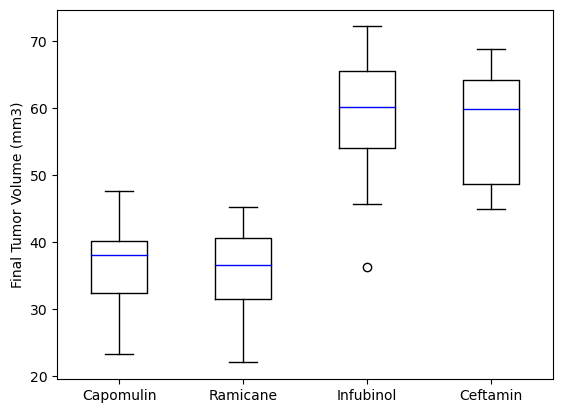

In [159]:
boxplot = new_df.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='b'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')

# line and scatter points

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

In [160]:
capomulin_df = clean_total_data.loc[(clean_total_data["Drug Regimen"] == "Capomulin") & (clean_total_data["Mouse ID"] == "l509") ]
reduced_capomulin_df = capomulin_df[["Timepoint","Tumor Volume (mm3)" ]]
reduced_capomulin_df = reduced_capomulin_df.set_index(["Timepoint"])

In [161]:
timepoint = reduced_capomulin_df.index.values
tumor_vol = reduced_capomulin_df.values

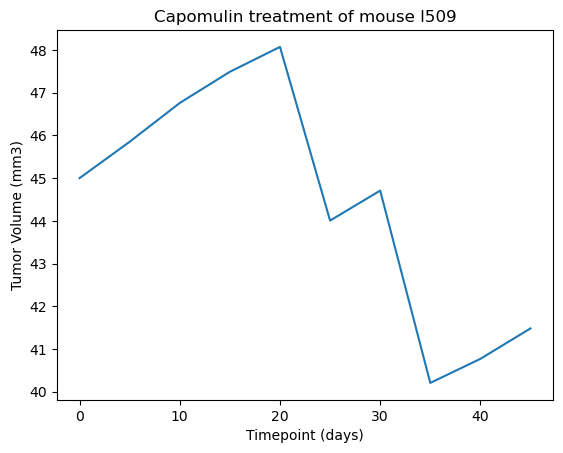

In [162]:
plt.plot(timepoint, tumor_vol)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [163]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

In [164]:
new_capomulin_df = clean_total_data.loc[(clean_total_data["Drug Regimen"] == "Capomulin")]
group_capomulin_df = new_capomulin_df.groupby("Mouse ID")

In [165]:
average_tumor_vol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"].mean()
average_capomulin_df = pd.DataFrame({"Weight (g)": weight,"Tumor Volume (mm3)": average_tumor_vol})

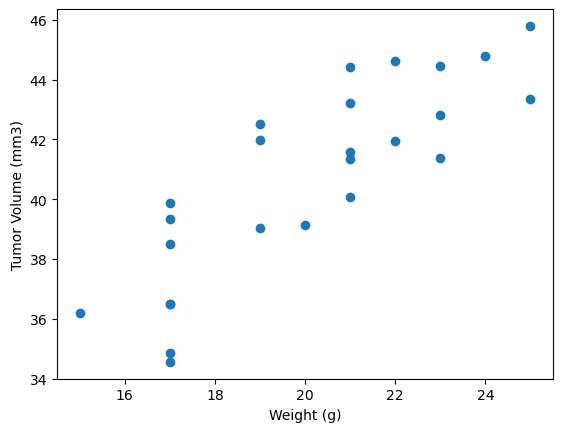

In [167]:
plt.scatter(weight, average_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

# correlation and regression

In [168]:
# Calculate the correlation coefficient and linear regression model

In [169]:
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

In [171]:
correlation = st.pearsonr (weight,average_tumor_vol )

The correlation between mouse weight and the average tumor volume is 0.84


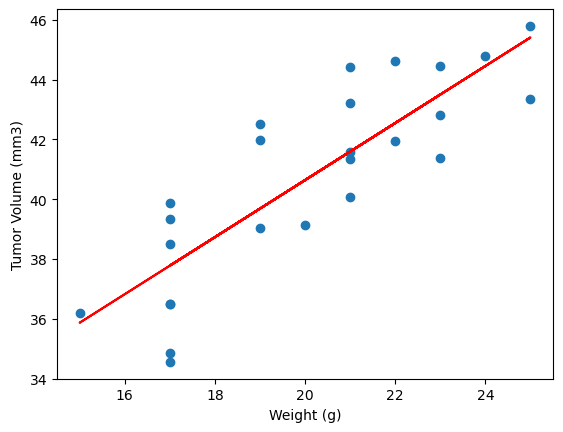

In [185]:
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
correlation = st.pearsonr (weight,average_tumor_vol )


x_values = average_capomulin_df["Weight (g)"]
y_values = average_capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, average_tumor_vol)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
